# Gathering Data

*1. The WeRateDogs Twitter archive:*
- file: twitter-archive-enhanced.csv
- download manually and upload to project workspace

*2. The tweet image predictions:*
- file: image_predictions.tsv
- location: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- download programmatically with the `Requests` library

*3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting.*
- file: tweet_json.txt
- Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in the file
- Each tweet's JSON data should be written to its own line.
- Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [2]:
# load modules
import pandas as pd
import requests
import json
import numpy as np

In [3]:
# read in the WeRateDogs Twitter archive:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# download the image_predictions file and upload to project workspace
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

open('image_predictions.tsv', 'wb').write(r.content)

In [5]:
# read in the image_predictions file
predictions = pd.read_csv('image_predictions.tsv',sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# set-up tweepy
import tweepy

consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
# getting tweet-ids
ids=archive.tweet_id

In [8]:
# open and write to json-file:
# loop over all ids
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            print(tweet_id)
#        except:
#            print('no data for id '+ str(tweet_id))
    

In [9]:
# read json file line by line
jsonfile = []
with open('tweet_json.txt') as file:
    for line in file:
        jsonfile.append(json.loads(line))

In [10]:
# writing list of dictionaries (json) to pandas dataframe
lotsofdata = pd.io.json.json_normalize(jsonfile)
lotsofdata.head()

,contributors,coordinates,created_at,display_text_range,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,...,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]",[],"[{'id': 892420639486877696, 'id_str': '8924206...",[],[],[],"[{'id': 892420639486877696, 'id_str': '8924206...",...,000000,False,False,dog_rates,9784,None,none,https://t.co/N7sNNHSfPq,None,True
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]",[],"[{'id': 892177413194625024, 'id_str': '8921774...",[],[],[],"[{'id': 892177413194625024, 'id_str': '8921774...",...,000000,False,False,dog_rates,9784,None,none,https://t.co/N7sNNHSfPq,None,True
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]",[],"[{'id': 891815175371796480, 'id_str': '8918151...",[],[],[],"[{'id': 891815175371796480, 'id_str': '8918151...",...,000000,False,False,dog_rates,9784,None,none,https://t.co/N7sNNHSfPq,None,True
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]",[],"[{'id': 891689552724799489, 'id_str': '8916895...",[],[],[],"[{'id': 891689552724799489, 'id_str': '8916895...",...,000000,False,False,dog_rates,9784,None,none,https://t.co/N7sNNHSfPq,None,True
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","[{'text': 'BarkWeek', 'indices': [129, 138]}]","[{'id': 891327551943041024, 'id_str': '8913275...",[],[],[],"[{'id': 891327551943041024, 'id_str': '8913275...",...,000000,False,False,dog_rates,9784,None,none,https://t.co/N7sNNHSfPq,None,True


In [11]:
#choose only few colums:
counts = lotsofdata[['id','created_at','favorite_count','retweet_count']]
counts.head()

,id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,37874,8265
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,32541,6109
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,24504,4044
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,41228,8412
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,39403,9110


# Assessing Data

## Visual Assessment

In [12]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
counts

,id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,37874,8265
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,32541,6109
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,24504,4044
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,41228,8412
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,39403,9110
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,19811,3028
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,11579,2002
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,63913,18352
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,27219,4164
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,31223,7179


## Programmatic Assessment

In [15]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
archive.sort_values(by=['in_reply_to_status_id'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1914,674330906434379776,6.658147e+17,1.637468e+07,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1339,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453...,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675...,10,10,None,None,None,pupper,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2036,671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm just going to leave this one here as well....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671729906...,13,10,None,None,None,None,None


In [17]:
archive.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Penny           10
Lola            10
Tucker          10
Winston          9
Bo               9
the              8
Sadie            8
an               7
Daisy            7
Toby             7
Bailey           7
Buddy            7
Leo              6
Koda             6
Jack             6
Dave             6
Milo             6
Rusty            6
Bella            6
Jax              6
Stanley          6
Oscar            6
Scout            6
Sammy            5
              ... 
Kawhi            1
Jordy            1
Jockson          1
Gabby            1
Jett             1
Dietrich         1
Bruiser          1
Tessa            1
Tuck             1
Skye             1
Wishes           1
infuriating      1
Snoopy           1
Hero             1
Marvin           1
Mingus           1
Ginger           1
Bubba            1
Stuart           1
Lugan            1
Carbon           1
Wiggles     

In [18]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
teddy                         18
Eskimo_dog                    18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [23]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
id                2340 non-null int64
created_at        2340 non-null object
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.2+ KB


In [24]:
print(archive.columns)
print(predictions.columns)
print(counts.columns)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
Index(['id', 'created_at', 'favorite_count', 'retweet_count'], dtype='object')


In [25]:
archive[['expanded_urls','source']].head()

,expanded_urls,source
0,https://twitter.com/dog_rates/status/892420643...,"<a href=""http://twitter.com/download/iphone"" r..."
1,https://twitter.com/dog_rates/status/892177421...,"<a href=""http://twitter.com/download/iphone"" r..."
2,https://twitter.com/dog_rates/status/891815181...,"<a href=""http://twitter.com/download/iphone"" r..."
3,https://twitter.com/dog_rates/status/891689557...,"<a href=""http://twitter.com/download/iphone"" r..."
4,https://twitter.com/dog_rates/status/891327558...,"<a href=""http://twitter.com/download/iphone"" r..."


In [26]:
predictions.jpg_url.head()

0    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
Name: jpg_url, dtype: object

**Quality Issues**

`archive` table:
- tweets with retweeted_status are included in the table
- replies are included in the table
- missing values in various columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- id-columns ('in_reply_to_status_id', 'in_reply_to_user_id',retweeted_status_id, 'retweeted_status_user_id') should not be floats
- timestamp-columns ('timstamp', 'retweeted_status_timestamp') should not be objects
- 745 times 'None' as a dog name
- dog names do not seem to be correct (55 times 'a', 8 times 'the', 7 times 'an' as dog name)
- some very low and some very high values in the numerator of the rating
- denominator is not always 10
- many missing values in dog stages columns
- many posts are not ratings, but posts saying "we only rate dogs, stop sending other pictures" or similar

`predictions` table: 
- some dog types are capitalized, other are spelled with lower case letters
- less entries than in the `archive` table

`counts` table: 
- less entries than in the `archive` table

**Tidiness Issues:**

- `archive` table: dog-stages should be represented in one column and not in four
- the data is scattered over three tables

# Cleaning

In [27]:
# copy all dataframes
archive_clean = archive.copy()
predictions_clean = predictions.copy()
counts_clean = counts.copy()

## Missing Values

### Define:
#### Missing values in the `archive` table:
- We should not have rows with 'retweeted_status' or 'reply' because we only want original ratings and no retweets. I will remove all rows with non-null values in these two columns and then drop the columns. 
- We cannot solve the problem that we have missing 'expanded_urls' at the moment. 

### Code:

In [28]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [29]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()]
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [30]:
archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                    'in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Test:

In [ ]:
archive_clean.info()

### Define:
#### find dog stages in text field to substitute at least some of the missing values

### Code:

In [31]:
print(archive_clean.doggo.str.contains('doggo').sum())
print(archive_clean.floofer.str.contains('floofer').sum())
print(archive_clean.pupper.str.contains('pupper').sum())
print(archive_clean.puppo.str.contains('puppo').sum())

83
10
230
24


In [32]:
archive_clean.doggo[archive_clean.text.str.contains('doggo')]='doggo'
archive_clean.floofer[archive_clean.text.str.contains('floofer')]='floofer'
archive_clean.pupper[archive_clean.text.str.contains('pupper')]='pupper'
archive_clean.puppo[archive_clean.text.str.contains('puppo')]='puppo'

archive_clean.doggo[archive_clean.text.str.contains('Doggo')]='doggo'
archive_clean.floofer[archive_clean.text.str.contains('Floofer')]='floofer'
archive_clean.pupper[archive_clean.text.str.contains('Pupper')]='pupper'
archive_clean.puppo[archive_clean.text.str.contains('Puppo')]='puppo'

archive_clean.doggo[archive_clean.text.str.contains('doggos')]='doggo'
archive_clean.floofer[archive_clean.text.str.contains('floofers')]='floofer'
archive_clean.pupper[archive_clean.text.str.contains('puppers')]='pupper'
archive_clean.puppo[archive_clean.text.str.contains('puppos')]='puppo'

archive_clean.doggo[archive_clean.text.str.contains('Doggos')]='doggo'
archive_clean.floofer[archive_clean.text.str.contains('Floofers')]='floofer'
archive_clean.pupper[archive_clean.text.str.contains('Puppers')]='pupper'
archive_clean.puppo[archive_clean.text.str.contains('Puppos')]='puppo'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-p

### Test:

In [33]:
print(archive_clean.doggo.str.contains('doggo').sum())
print(archive_clean.floofer.str.contains('floofer').sum())
print(archive_clean.pupper.str.contains('pupper').sum())
print(archive_clean.puppo.str.contains('puppo').sum())

91
10
254
30


## Tidiness

### Define:
#### create a column named 'dog_stages' and sustitute it for the four columns 'doggo', 'floofer', 'pupper, 'puppo'

### Code:

In [34]:
archive_clean.doggo.replace('None',np.nan,inplace=True)
archive_clean.floofer.replace('None',np.nan,inplace=True)
archive_clean.pupper.replace('None',np.nan,inplace=True)
archive_clean.puppo.replace('None',np.nan,inplace=True)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 91 non-null object
floofer               10 non-null object
pupper                254 non-null object
puppo                 30 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [35]:
archive_clean['dog_stages']=np.nan

In [36]:
archive_clean.dog_stages[archive_clean.doggo.notnull()]='doggo'
archive_clean.dog_stages[archive_clean.floofer.notnull()]='floofer'
archive_clean.dog_stages[archive_clean.pupper.notnull()]='pupper'
archive_clean.dog_stages[archive_clean.puppo.notnull()]='puppo'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [38]:
archive_clean.dog_stages=archive_clean.dog_stages.astype('category')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stages            373 non-null category
dtypes: category(1), int64(3), object(5)
memory usage: 149.7+ KB


### Test:

In [ ]:
archive_clean.head(20)

In [ ]:
archive_clean.info()

### Define:
#### merge all data into one table

- join by tweet_id, 
- take only tweets into account that are present in the archive table
- because we have less entries in the `predictions` and `counts` tables than in the `archive` table, there will be missing values in these "new" columns 

### Code:

In [39]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [40]:
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [41]:
master = pd.merge(archive_clean, predictions_clean, on=['tweet_id'], how='left')
master = pd.merge(master, counts_clean, left_on=['tweet_id'], right_on=['id'], how='left')
master.drop(['id','created_at'],axis=1,inplace=True)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37874.0,8265.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32541.0,6109.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24504.0,4044.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,41228.0,8412.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39403.0,9110.0


### Test:

In [ ]:
master.head()

In [42]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stages            373 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
favorite_count        2095 non-

## Quality

### Define:
#### change all dog types to start with a capital letter 
- use str.title() on columns p1, p2, and p3

### Code:

In [43]:
master.p1=master.p1.str.title()
master.p2=master.p2.str.title()
master.p3=master.p3.str.title()

### Test:

In [44]:
pd.unique(master[['p1','p2','p3']].values.ravel('K'))

array(['Orange', 'Chihuahua', 'Paper_Towel', 'Basset',
       'Chesapeake_Bay_Retriever', 'Appenzeller', 'Pomeranian',
       'Irish_Terrier', 'Pembroke', 'Samoyed', 'French_Bulldog',
       'Golden_Retriever', 'Whippet', 'Siberian_Husky', 'Limousine',
       'Mexican_Hairless', 'Kuvasz', 'Convertible', 'Pug',
       'Blenheim_Spaniel', nan, 'Malamute', 'Italian_Greyhound', 'Chow',
       'German_Shepherd', 'Doberman', 'Eskimo_Dog', 'Labrador_Retriever',
       'Web_Site', 'Weimaraner', 'Saluki', 'Tusker', 'Street_Sign',
       'Miniature_Pinscher', 'German_Short-Haired_Pointer',
       'English_Springer', 'Tricycle', 'Tabby', 'Vizsla', 'Bloodhound',
       'Bernese_Mountain_Dog', 'West_Highland_White_Terrier',
       'Cocker_Spaniel', 'Flat-Coated_Retriever', 'Cardigan',
       'Newfoundland', 'Basketball', 'Shetland_Sheepdog', 'Komondor',
       'Kelpie', 'Home_Theater', 'Greater_Swiss_Mountain_Dog',
       'Comic_Book', 'Laptop', 'Border_Collie', 'Pole', 'Bull_Mastiff',
       'Marm

In [45]:
master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,37874.0,8265.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,32541.0,6109.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,24504.0,4044.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,41228.0,8412.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,39403.0,9110.0


### Define: 
#### changing id-columns from type float to type integer

- columns have already been removed

### Define: 
#### changing timestamp column from type object to type datetime

- 'timestamp'
- 'retweeted_status_timestamp' is already removed

### Code:

In [46]:
master.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [47]:
master.timestamp = pd.to_datetime(master.timestamp)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Test:

In [ ]:
master.timestamp.head()

### Define: 
#### Removing posts that are not dog ratings 

- these posts state "we only rate dogs", "I only rate dog", "this is not a dog"

### Code:

In [48]:
sum(master.text.str.contains(r'[Ww]e only rate dogs'))

53

In [49]:
sum(master.text.str.contains(r'[Ii] only rate dogs'))

1

In [50]:
sum(master.text.str.contains('not a dog'))

1

In [51]:
master=master[~master.text.str.contains(r'[Ww]e only rate dogs')]
master=master[~master.text.str.contains(r'[Ii]e only rate dogs')]
master=master[~master.text.str.contains(r'not a dog')]

### Test:

In [52]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2043 non-null int64
timestamp             2043 non-null datetime64[ns]
source                2043 non-null object
text                  2043 non-null object
expanded_urls         2040 non-null object
rating_numerator      2043 non-null int64
rating_denominator    2043 non-null int64
name                  2043 non-null object
dog_stages            373 non-null category
jpg_url               1917 non-null object
img_num               1917 non-null float64
p1                    1917 non-null object
p1_conf               1917 non-null float64
p1_dog                1917 non-null object
p2                    1917 non-null object
p2_conf               1917 non-null float64
p2_dog                1917 non-null object
p3                    1917 non-null object
p3_conf               1917 non-null float64
p3_dog                1917 non-null object
favorite_count        2

### Define:
#### fix rating (numerator and denominator)

- find ratings with denominator = 10 and according numerator
- look for other ratings

### Code:

In [53]:
# creating new columns for "new" rating values, start values are NaNs
master['new_denominator']=np.nan
master['new_numerator']=np.nan

In [54]:
# loop over all rows to find patterns in text column that could show rating
# look for a rating with a 10 as denominator first
track_ids=[]
for i in master.index:
    print('i='+str(i))
    if '/10' in master.text[i]:
        num = master.text[i][:master.text[i].find('/10')].split()[-1]
        master.new_numerator[i]=num
        master.new_denominator[i]=10
    elif '/' in master.text[i]:
        num = master.text[i][:master.text[i].find('/')].split()[-1]
        denom = master.text[i][master.text[i].find('/')+1:].split()[0]
        master.new_numerator[i]=num
        master.new_denominator[i]=denom
    else:
        track_ids.append(i)

i=0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
i=100
i=101
i=102
i=103
i=104
i=105
i=106
i=107
i=108
i=110
i=111
i=113
i=114
i=115
i=116
i=117
i=118
i=119
i=121
i=122
i=123
i=124
i=125
i=126
i=127
i=128
i=129
i=131
i=132
i=133
i=134
i=135
i=136
i=137
i=138
i=139
i=140
i=142
i=143
i=144
i=145
i=146
i=147
i=148
i=149
i=150
i=151
i=152
i=153
i=154
i=155
i=157
i=158
i=159
i=160
i=161
i=162
i=163
i=164
i=165
i=166
i=167
i=168
i=169
i=170
i=171
i=172
i=173
i=174
i=175
i=176
i=177
i=179
i=180
i=181
i=183
i=184
i=185
i=186
i=187
i=188
i=189
i=190
i=191
i=192
i=193
i=194
i=195
i

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


i=340
i=341
i=342
i=343
i=344
i=345
i=346
i=347
i=348
i=349
i=350
i=351
i=352
i=353
i=354
i=355
i=356
i=357
i=358
i=359
i=360
i=361
i=362
i=363
i=364
i=365
i=366
i=367
i=368
i=369
i=370
i=371
i=372
i=373
i=374
i=375
i=376
i=377
i=378
i=379
i=380
i=381
i=382
i=383
i=385
i=386
i=387
i=388
i=389
i=390
i=391
i=392
i=393
i=394
i=395
i=396
i=397
i=398
i=399
i=400
i=401
i=402
i=403
i=404
i=405
i=406
i=407
i=409
i=410
i=411
i=412
i=413
i=414
i=415
i=416
i=417
i=418
i=419
i=420
i=421
i=422
i=423
i=425
i=426
i=427
i=428
i=429
i=430
i=431
i=432
i=433
i=434
i=435
i=436
i=437
i=438
i=439
i=440
i=441
i=442
i=443
i=444
i=445
i=446
i=447
i=448
i=449
i=450
i=451
i=452
i=453
i=454
i=455
i=456
i=457
i=458
i=459
i=460
i=461
i=462
i=463
i=464
i=465
i=466
i=467
i=468
i=469
i=470
i=471
i=472
i=473
i=474
i=475
i=476
i=477
i=478
i=479
i=480
i=481
i=482
i=483
i=484
i=485
i=486
i=487
i=488
i=489
i=490
i=491
i=492
i=493
i=494
i=495
i=496
i=497
i=498
i=499
i=500
i=501
i=502
i=503
i=504
i=505
i=506
i=507
i=508
i=50

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


i=621
i=622
i=623
i=624
i=625
i=626
i=627
i=628
i=629
i=630
i=632
i=633
i=634
i=635
i=636
i=637
i=638
i=639
i=640
i=641
i=642
i=643
i=644
i=645
i=646
i=647
i=648
i=649
i=650
i=651
i=652
i=653
i=654
i=655
i=656
i=657
i=658
i=659
i=660
i=661
i=662
i=663
i=664
i=665
i=666
i=667
i=668
i=669
i=670
i=672
i=673
i=674
i=675
i=676
i=677
i=678
i=679
i=680
i=681
i=682
i=683
i=684
i=685
i=686
i=688
i=689
i=690
i=691
i=692
i=693
i=694
i=695
i=696
i=697
i=698
i=699
i=700
i=701
i=702
i=703
i=704
i=705
i=706
i=707
i=708
i=709
i=710
i=711
i=712
i=713
i=714
i=715
i=716
i=717
i=718
i=719
i=720
i=721
i=722
i=723
i=724
i=725
i=726
i=727
i=728
i=729
i=730
i=731
i=732
i=733
i=734
i=735
i=736
i=737
i=738
i=739
i=740
i=741
i=742
i=743
i=744
i=745
i=746
i=747
i=748
i=749
i=750
i=751
i=752
i=753
i=754
i=755
i=756
i=757
i=758
i=759
i=760
i=761
i=762
i=763
i=764
i=765
i=766
i=767
i=768
i=769
i=770
i=771
i=772
i=773
i=774
i=775
i=776
i=777
i=778
i=779
i=780
i=781
i=782
i=783
i=784
i=785
i=786
i=787
i=788
i=789
i=79

i=1876
i=1877
i=1878
i=1879
i=1880
i=1881
i=1882
i=1883
i=1884
i=1885
i=1886
i=1887
i=1888
i=1889
i=1890
i=1891
i=1892
i=1893
i=1894
i=1895
i=1896
i=1897
i=1898
i=1899
i=1900
i=1901
i=1902
i=1903
i=1904
i=1905
i=1906
i=1907
i=1908
i=1909
i=1910
i=1911
i=1912
i=1913
i=1914
i=1915
i=1916
i=1917
i=1918
i=1919
i=1920
i=1921
i=1922
i=1923
i=1924
i=1925
i=1926
i=1927
i=1928
i=1929
i=1930
i=1931
i=1932
i=1933
i=1934
i=1935
i=1936
i=1937
i=1938
i=1939
i=1940
i=1941
i=1942
i=1943
i=1944
i=1945
i=1946
i=1947
i=1948
i=1949
i=1950
i=1951
i=1952
i=1953
i=1954
i=1955
i=1956
i=1957
i=1958
i=1959
i=1960
i=1961
i=1962
i=1963
i=1964
i=1965
i=1966
i=1967
i=1968
i=1969
i=1970
i=1971
i=1972
i=1973
i=1974
i=1975
i=1976
i=1977
i=1978
i=1979
i=1980
i=1981
i=1982
i=1983
i=1984
i=1985
i=1986
i=1987
i=1988
i=1989
i=1990
i=1991
i=1992
i=1993
i=1994
i=1995
i=1996
i=1997
i=1998
i=1999
i=2000
i=2001
i=2002
i=2003
i=2004
i=2005
i=2006
i=2007
i=2008
i=2009
i=2010
i=2011
i=2012
i=2013
i=2014
i=2015
i=2016
i=2017
i=2018

In [55]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2096
Data columns (total 24 columns):
tweet_id              2043 non-null int64
timestamp             2043 non-null datetime64[ns]
source                2043 non-null object
text                  2043 non-null object
expanded_urls         2040 non-null object
rating_numerator      2043 non-null int64
rating_denominator    2043 non-null int64
name                  2043 non-null object
dog_stages            373 non-null category
jpg_url               1917 non-null object
img_num               1917 non-null float64
p1                    1917 non-null object
p1_conf               1917 non-null float64
p1_dog                1917 non-null object
p2                    1917 non-null object
p2_conf               1917 non-null float64
p2_dog                1917 non-null object
p3                    1917 non-null object
p3_conf               1917 non-null float64
p3_dog                1917 non-null object
favorite_count        2

In [56]:
#check again all ratings with denominators unequal 10
for i in master.query('new_denominator != 10.0').index:
    print('index='+str(i))
    print(master.text[i])
    print(master.new_denominator[i])
    print(master.new_numerator[i])

index=339
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
70.0
84.0
index=403
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
7.0
24.0
index=700
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
150.0
165
index=904
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
170.0
204
index=1011
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
90.0
99
index=1036
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
80.0
80
index=1056
From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
50.0
45
index=1129
Here is a whole flock of puppers.  6

#### scale ratings to one dog
*It seems like ratings with a denominator > 10 usually refer to a picture of more than one dog. To be able to do statistics with the ratings I will scale these to all have 10 as a denominator.*

In [57]:
# for index 700 devide by 15
master.new_denominator[700]=float(master.new_denominator[700])/15
master.new_numerator[700]=float(master.new_numerator[700])/15
# for index 339 devide by 7
master.new_denominator[339]=float(master.new_denominator[339])/7
master.new_numerator[339]=float(master.new_numerator[339])/7
# for index 1036 devide by 8
master.new_denominator[1036]=float(master.new_denominator[1036])/8
master.new_numerator[1036]=float(master.new_numerator[1036])/8
# for index 1011 devide by 9
master.new_denominator[1011]=float(master.new_denominator[1011])/9
master.new_numerator[1011]=float(master.new_numerator[1011])/9
# for index 904 devide by 17
master.new_denominator[904]=float(master.new_denominator[904])/17
master.new_numerator[904]=float(master.new_numerator[904])/17
# for index 1210 devide by 4
master.new_denominator[1210]=float(master.new_denominator[1210])/4
master.new_numerator[1210]=float(master.new_numerator[1210])/4
# for index 1129 devide by 5
master.new_denominator[1129]=float(master.new_denominator[1129])/5
master.new_numerator[1129]=float(master.new_numerator[1129])/5
# for index 1056 devide by 5
master.new_denominator[1056]=float(master.new_denominator[1056])/5
master.new_numerator[1056]=float(master.new_numerator[1056])/5
# for index 1602 devide by 8
master.new_denominator[1602]=float(master.new_denominator[1602])/8
master.new_numerator[1602]=float(master.new_numerator[1602])/8
# for index 1540 devide by 12
master.new_denominator[1540]=float(master.new_denominator[1540])/12
master.new_numerator[1540]=float(master.new_numerator[1540])/12
# for index 1399 devide by 11
master.new_denominator[1399]=float(master.new_denominator[1399])/11
master.new_numerator[1399]=float(master.new_numerator[1399])/11

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWith

#### drop tweet with id 403, because it does not contain a rating

In [58]:
master.drop(403,axis=0,inplace=True)

### Test:

In [59]:
#check again if there are still ratings with denominators unequal 10
for i in master.query('new_denominator != 10.0').index:
    print('index='+str(i))
    print(master.text[i])
    print(master.new_denominator[i])
    print(master.new_numerator[i])

### Define:
#### change type of new_denominator column and drop old column

### Code:

In [60]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2096
Data columns (total 24 columns):
tweet_id              2042 non-null int64
timestamp             2042 non-null datetime64[ns]
source                2042 non-null object
text                  2042 non-null object
expanded_urls         2039 non-null object
rating_numerator      2042 non-null int64
rating_denominator    2042 non-null int64
name                  2042 non-null object
dog_stages            373 non-null category
jpg_url               1916 non-null object
img_num               1916 non-null float64
p1                    1916 non-null object
p1_conf               1916 non-null float64
p1_dog                1916 non-null object
p2                    1916 non-null object
p2_conf               1916 non-null float64
p2_dog                1916 non-null object
p3                    1916 non-null object
p3_conf               1916 non-null float64
p3_dog                1916 non-null object
favorite_count        2

In [61]:
master.drop(['rating_denominator'],axis=1,inplace=True)

In [62]:
master.rename(columns={'new_denominator':'rating_denominator'},inplace=True)

In [63]:
master.rating_denominator=master.rating_denominator.astype(int)

### Test:

In [64]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id              2042 non-null int64
timestamp             2042 non-null datetime64[ns]
source                2042 non-null object
text                  2042 non-null object
expanded_urls         2039 non-null object
rating_numerator      2042 non-null int64
name                  2042 non-null object
dog_stages            373 non-null category
jpg_url               1916 non-null object
img_num               1916 non-null float64
p1                    1916 non-null object
p1_conf               1916 non-null float64
p1_dog                1916 non-null object
p2                    1916 non-null object
p2_conf               1916 non-null float64
p2_dog                1916 non-null object
p3                    1916 non-null object
p3_conf               1916 non-null float64
p3_dog                1916 non-null object
favorite_count        2041 non-null float64
retweet_count        

### Define:
#### check and fix new rating numerator

### Code:

In [65]:
master.new_numerator.value_counts()

10            393
11            303
12            250
12.0          225
13.0          214
9             143
11.0          101
8              95
13             70
7              50
14.0           33
5              32
6              31
10.0           26
3              17
4              15
2               8
...10           6
14              5
1               4
...11           3
...12           2
(8              1
420             1
3.0             1
5.0             1
6.0             1
9.75            1
ovation.13      1
10&amp;2        1
11.27           1
...9            1
1776            1
11.26           1
13.5            1
it.10           1
9.0             1
0.0             1
Name: new_numerator, dtype: int64

In [66]:
master.new_numerator.replace('ovation.13','13',inplace=True)
master.new_numerator.replace('it.10','10',inplace=True)
master.new_numerator.replace('(8','8',inplace=True)
master.new_numerator.replace('...9','9',inplace=True)
master.new_numerator.replace('...12','12',inplace=True)
master.new_numerator.replace('...11','11',inplace=True)
master.new_numerator.replace('...10','10',inplace=True)
master.new_numerator.replace('10&amp;2','2',inplace=True)

### Test:

In [67]:
master.new_numerator.value_counts()

10       400
11       306
12       252
12.0     225
13.0     214
9        144
11.0     101
8         96
13        71
7         50
14.0      33
5         32
6         31
10.0      26
3         17
4         15
2          9
14         5
1          4
1776       1
420        1
9.0        1
11.27      1
13.5       1
11.26      1
9.75       1
6.0        1
5.0        1
3.0        1
0.0        1
Name: new_numerator, dtype: int64

### Define:
#### change type of new numerator column and remove old numerator column

### Code:

In [68]:
# change to type float (does not need to be and integer value)
master.new_numerator=master.new_numerator.astype(float)

In [69]:
master.drop(['rating_numerator'],axis=1,inplace=True)

In [70]:
master.rename(columns={'new_numerator':'rating_numerator'},inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2042 non-null int64
timestamp             2042 non-null datetime64[ns]
source                2042 non-null object
text                  2042 non-null object
expanded_urls         2039 non-null object
name                  2042 non-null object
dog_stages            373 non-null category
jpg_url               1916 non-null object
img_num               1916 non-null float64
p1                    1916 non-null object
p1_conf               1916 non-null float64
p1_dog                1916 non-null object
p2                    1916 non-null object
p2_conf               1916 non-null float64
p2_dog                1916 non-null object
p3                    1916 non-null object
p3_conf               1916 non-null float64
p3_dog                1916 non-null object
favorite_count        2041 non-null float64
retweet_count         2041 non-null float64
rating_denominator 

### Test:

In [ ]:
master.info()

In [71]:
master.rating_numerator.value_counts()

12.00      477
10.00      426
11.00      407
13.00      285
9.00       145
8.00        96
7.00        50
14.00       38
5.00        33
6.00        32
3.00        18
4.00        15
2.00         9
1.00         4
1776.00      1
9.75         1
0.00         1
13.50        1
11.26        1
11.27        1
420.00       1
Name: rating_numerator, dtype: int64

### Define:
#### fix dog names

- change 'None' to NaN
- fix obvious mistakes like 'a', 'an', 'the'
- see if more dog names can be found in the text column

### Code:

In [72]:
master.name.value_counts()

None         570
a             49
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Daisy          7
the            7
Toby           7
Stanley        6
Oscar          6
Bailey         6
Koda           6
Bella          6
Jax            6
Bo             6
Rusty          5
Louis          5
Scout          5
Bentley        5
Leo            5
Dave           5
Milo           5
Buddy          5
Chester        5
            ... 
Tripp          1
Rubio          1
Striker        1
Vince          1
Beckham        1
Eazy           1
Kaiya          1
Loomis         1
Glenn          1
Mauve          1
Mack           1
Petrick        1
Anthony        1
Lambeau        1
Chase          1
Dale           1
Pinot          1
Lizzie         1
Genevieve      1
Shaggy         1
Gert           1
Sky            1
River          1
Comet          1
Tito           1
Saydee         1
Sierra         1
Napolean      

In [73]:
# setting non-valid dog names to nan
master['new_names']=master.name
bad_names=['None','a','an','the','such','life']
for n in bad_names:
    master.new_names.replace(n,np.nan,inplace=True)
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id              2042 non-null int64
timestamp             2042 non-null datetime64[ns]
source                2042 non-null object
text                  2042 non-null object
expanded_urls         2039 non-null object
name                  2042 non-null object
dog_stages            373 non-null category
jpg_url               1916 non-null object
img_num               1916 non-null float64
p1                    1916 non-null object
p1_conf               1916 non-null float64
p1_dog                1916 non-null object
p2                    1916 non-null object
p2_conf               1916 non-null float64
p2_dog                1916 non-null object
p3                    1916 non-null object
p3_conf               1916 non-null float64
p3_dog                1916 non-null object
favorite_count        2041 non-null float64
retweet_count         2041 non-null float64
rating_denominator 

In [74]:
master.new_names.value_counts()

Lucy           11
Charlie        11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Winston         8
Lola            8
Sadie           8
Toby            7
Daisy           7
Bo              6
Bailey          6
Stanley         6
Oscar           6
Bella           6
Jax             6
Koda            6
Milo            5
Rusty           5
Bentley         5
Dave            5
Chester         5
Scout           5
Louis           5
Leo             5
Buddy           5
Dexter          4
Reggie          4
Alfie           4
               ..
Jay             1
Taz             1
Meera           1
Balto           1
Pippin          1
Diogi           1
Batdog          1
Andy            1
Kial            1
Cali            1
Chelsea         1
Benny           1
Skye            1
Wishes          1
infuriating     1
Snoopy          1
Gidget          1
Hero            1
Koko            1
Marvin          1
Mingus          1
Ginger          1
Bubba           1
Philbert        1
Tuck      

In [75]:
mask=master[master.new_names.isnull()]

In [76]:
phrases = ['named','name is','Meet','meet','is called']
for phrase in phrases:
    print('phrase = '+phrase)
    for i in mask.index:
        if phrase in mask.text[i]:
            print('index = '+str(i))
            n=master.text[i][master.text[i].find(phrase)+len(phrase):].split()[0]
            if n not in bad_names:
                master.new_names[i]=n
                print(n)        

phrase = named
index = 1610
Wylie.
index = 1704


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Kip.
index = 1783
Jacob
index = 1813
Rufus.
index = 1863
Spork.
index = 1872
Cherokee.
index = 1875
Hemry.
index = 1893
Alphred.
index = 1907
Alfredo.
index = 1912
Zeus.
index = 1935
Leroi.
index = 1948
Berta.
index = 1962
Chuk.
index = 1971
Guss.
index = 1979
Alfonso.
index = 1993
Cheryl.
index = 1999
Jessiga.
index = 2006
Klint.
index = 2011
Tickles.
index = 2015
Kohl.
index = 2045
Pepe.
index = 2052
Octaviath.
index = 2055
Johm.
phrase = name is
index = 32
Howard.
index = 140
Zoey
index = 1441
Thea.
index = 1496
Sabertooth
index = 2009
Big
index = 2029
Daryl.
phrase = Meet
phrase = meet
phrase = is called


In [77]:
# remove punctuation from names
master.new_names.replace('.','',inplace=True)
master.new_names.value_counts()

Lucy           11
Charlie        11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Sadie           8
Lola            8
Winston         8
Daisy           7
Toby            7
Stanley         6
Jax             6
Oscar           6
Bella           6
Bo              6
Bailey          6
Koda            6
Dave            5
Leo             5
Chester         5
Milo            5
Bentley         5
Buddy           5
Rusty           5
Scout           5
Louis           5
George          4
Phil            4
Gus             4
               ..
Meera           1
Balto           1
Vinscent        1
Hurley          1
Eevee           1
light           1
Hero            1
Batdog          1
Kial            1
Cali            1
Chelsea         1
Benny           1
Skye            1
Wishes          1
infuriating     1
Snoopy          1
Gidget          1
Marvin          1
Diogi           1
Mingus          1
Ginger          1
Bubba           1
Philbert        1
Tuck            1
Stuart    

In [78]:
# remove old name list and substitute for new list
master.drop(['name'],axis=1,inplace=True)
master['name']=master.new_names
master.drop(['new_names'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2042 non-null int64
timestamp             2042 non-null datetime64[ns]
source                2042 non-null object
text                  2042 non-null object
expanded_urls         2039 non-null object
dog_stages            373 non-null category
jpg_url               1916 non-null object
img_num               1916 non-null float64
p1                    1916 non-null object
p1_conf               1916 non-null float64
p1_dog                1916 non-null object
p2                    1916 non-null object
p2_conf               1916 non-null float64
p2_dog                1916 non-null object
p3                    1916 non-null object
p3_conf               1916 non-null float64
p3_dog                1916 non-null object
favorite_count        2041 non-null float64
retweet_count         2041 non-null float64
rating_denominator    2042 non-null int64
rating_numerator    

### Test:

In [ ]:
master.info()

# Storing data

- store in a csv file called 'twitter_archive_master.csv'

In [79]:
master.to_csv('twitter_archive_master.csv', encoding='utf-8')

# Analyzing and Vizualizing

In [80]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id              2042 non-null int64
timestamp             2042 non-null datetime64[ns]
source                2042 non-null object
text                  2042 non-null object
expanded_urls         2039 non-null object
dog_stages            373 non-null category
jpg_url               1916 non-null object
img_num               1916 non-null float64
p1                    1916 non-null object
p1_conf               1916 non-null float64
p1_dog                1916 non-null object
p2                    1916 non-null object
p2_conf               1916 non-null float64
p2_dog                1916 non-null object
p3                    1916 non-null object
p3_conf               1916 non-null float64
p3_dog                1916 non-null object
favorite_count        2041 non-null float64
retweet_count         2041 non-null float64
rating_denominator    2042 non-null int64
rating_numerator    

## analyze by rating
*look at different ratings, e.g. if higher rated pictures are retweeted more often or get a higher favorite count*

In [81]:
master.groupby('rating_numerator').mean()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,rating_denominator
rating_numerator,,,,,,,,
0.00,835152434251116544,3.000000,0.967066,0.012731,0.007039,23493.000000,3227.000000,10
1.00,669897500535463936,1.000000,0.665055,0.061123,0.026324,6775.000000,2955.250000,10
2.00,670829170922582528,1.000000,0.720286,0.076080,0.053265,2135.666667,1257.888889,10
3.00,687867548868470784,1.000000,0.436541,0.124808,0.064525,2221.222222,846.500000,10
4.00,695682712039111936,1.000000,0.467073,0.159796,0.084312,2609.666667,1034.866667,10
5.00,681950968088746240,1.000000,0.561435,0.117271,0.056777,2504.606061,985.454545,10
6.00,688638293444438400,1.031250,0.465423,0.189002,0.074402,2583.687500,977.750000,10
7.00,686369160900343168,1.020000,0.546789,0.141890,0.064700,2833.540000,973.920000,10
8.00,686526216372515968,1.053763,0.531117,0.129907,0.057236,2302.291667,840.291667,10


In [82]:
# excluding the very high outliers from the rating for the analysis
df = master.query('rating_numerator < 15')

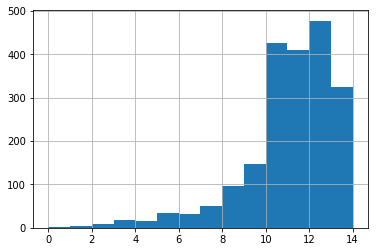

In [83]:
%matplotlib inline
#a histogram of all ratings (only numerators, since denominators are all 10 now)
df.rating_numerator.hist(bins=14);

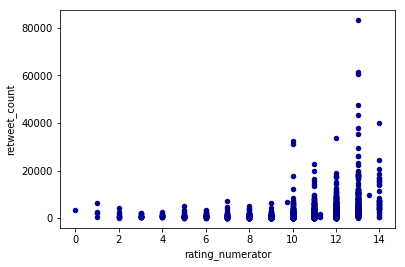

In [84]:
df.plot.scatter(x='rating_numerator',
                    y='retweet_count',
                    c='DarkBlue');

''

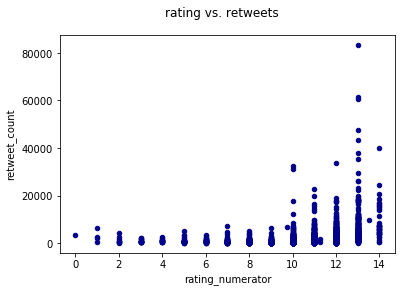

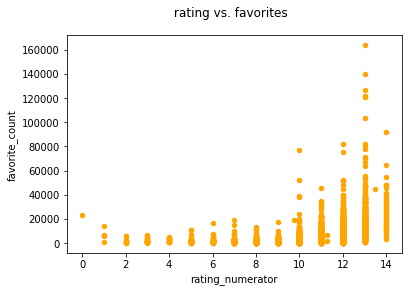

In [85]:
ax1 = df.plot(x='rating_numerator',y='retweet_count', kind='scatter',
        color='DarkBlue',subplots=True,title='rating vs. retweets')
ax2 = df.plot(x='rating_numerator',y='favorite_count', kind='scatter',
        color='orange',subplots=True, title=' rating vs. favorites')
;

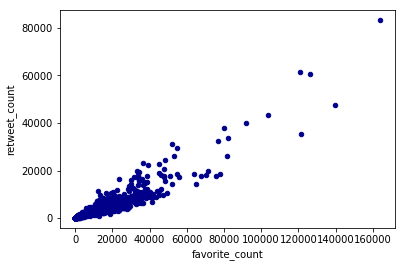

In [86]:
master.plot.scatter(x='favorite_count',
                   y='retweet_count',
                   c='DarkBlue');

## analyze by dog stage
*see if different dog stages get different ratings, retweets or favorite counts*

In [87]:
stages = master.groupby('dog_stages')['rating_numerator','retweet_count','favorite_count'].mean()
stages

,rating_numerator,retweet_count,favorite_count
dog_stages,,,
doggo,11.772152,6162.518987,17635.582278
floofer,11.800000,3832.900000,11160.700000
pupper,10.702874,2351.452756,7087.885827
puppo,12.166667,6487.300000,22445.900000


In [88]:
# put to relative rating or count to get all on the same scale
stages.rating_numerator = stages.rating_numerator/stages.rating_numerator.sum()
stages.retweet_count = stages.retweet_count/stages.retweet_count.sum()
stages.favorite_count = stages.favorite_count/stages.favorite_count.sum()

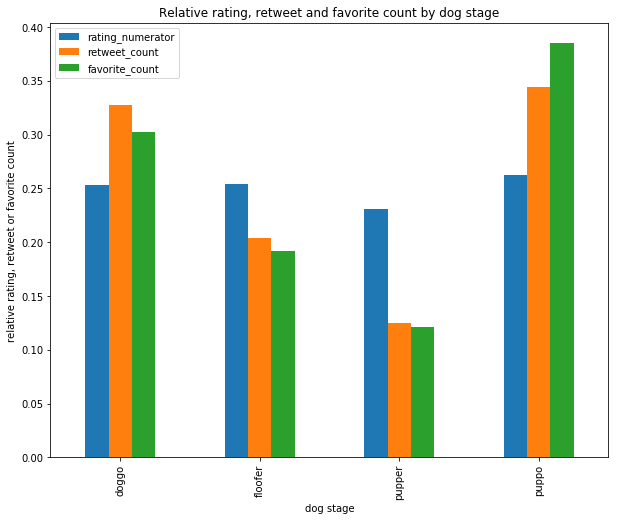

In [89]:
ax = stages.plot(y=['rating_numerator','retweet_count','favorite_count'],kind='bar',figsize=(10,8),
            title='Relative rating, retweet and favorite count by dog stage',)
ax.set_xlabel('dog stage')
ax.set_ylabel('relative rating, retweet or favorite count');

## analyse dog names and predicted types
*which ones occur most often?*

In [90]:
# find the 10 most often used names
name_count = master.groupby('name')['tweet_id'].count()
name_count.nlargest(10)

name
Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny       9
Tucker      9
Lola        8
Sadie       8
Winston     8
Daisy       7
Name: tweet_id, dtype: int64

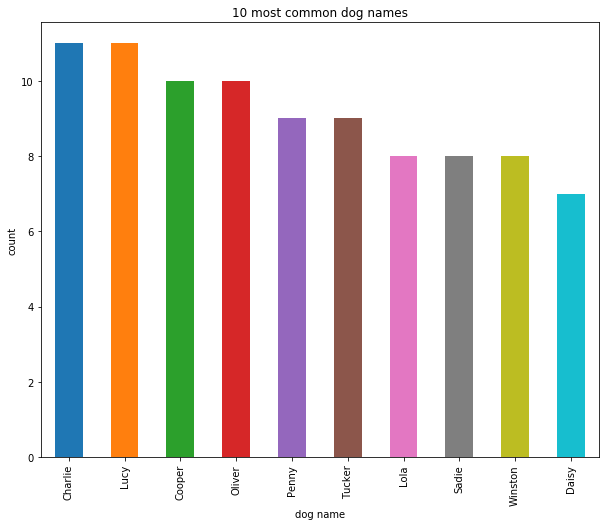

In [91]:
ax=name_count.nlargest(10).plot.bar(figsize=(10,8),title='10 most common dog names')
ax.set_xlabel('dog name')
ax.set_ylabel('count');

In [92]:
# how many different dog names are there?
master.name.nunique()

973

In [93]:
# find the 10 most often predicted dog types (if p1_conf is greater than 0.5 and p1_dog is True)
type_count = master.query('p1_dog == True & p1_conf > 0.5').groupby('p1')['tweet_id'].count()
type_count.nlargest(10)

p1
Golden_Retriever      113
Pembroke               67
Labrador_Retriever     60
Chihuahua              46
Pug                    40
Pomeranian             29
Samoyed                27
Chow                   23
Toy_Poodle             23
French_Bulldog         20
Name: tweet_id, dtype: int64

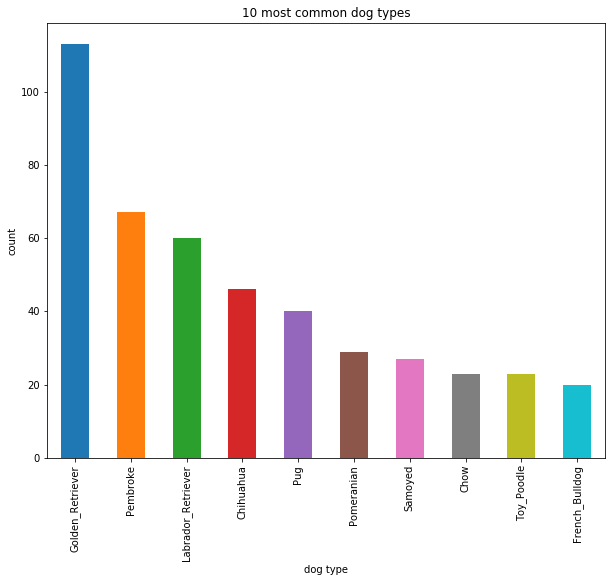

In [94]:
ax=type_count.nlargest(10).plot.bar(figsize=(10,8),title='10 most common dog types')
ax.set_xlabel('dog type')
ax.set_ylabel('count');

In [95]:
# how many different dogs types are there?
master.query('p1_dog == True & p1_conf > 0.5').p1.nunique()

99